<a href="https://colab.research.google.com/github/ArashDehghanyan/Hands-On_Machine_Learning/blob/main/Hands_on_ml_example_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import common modules
import sys
import sklearn
import numpy as np
import os
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    """Saves created figures on your storage device."""
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


#Download Data

In [2]:
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = os.path.join(DOWNLOAD_ROOT + HOUSING_PATH, "housing.tgz")

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    """Downloads data from the specified url to
     the given directory on your device."""

    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
# Load data
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histpogram_plots


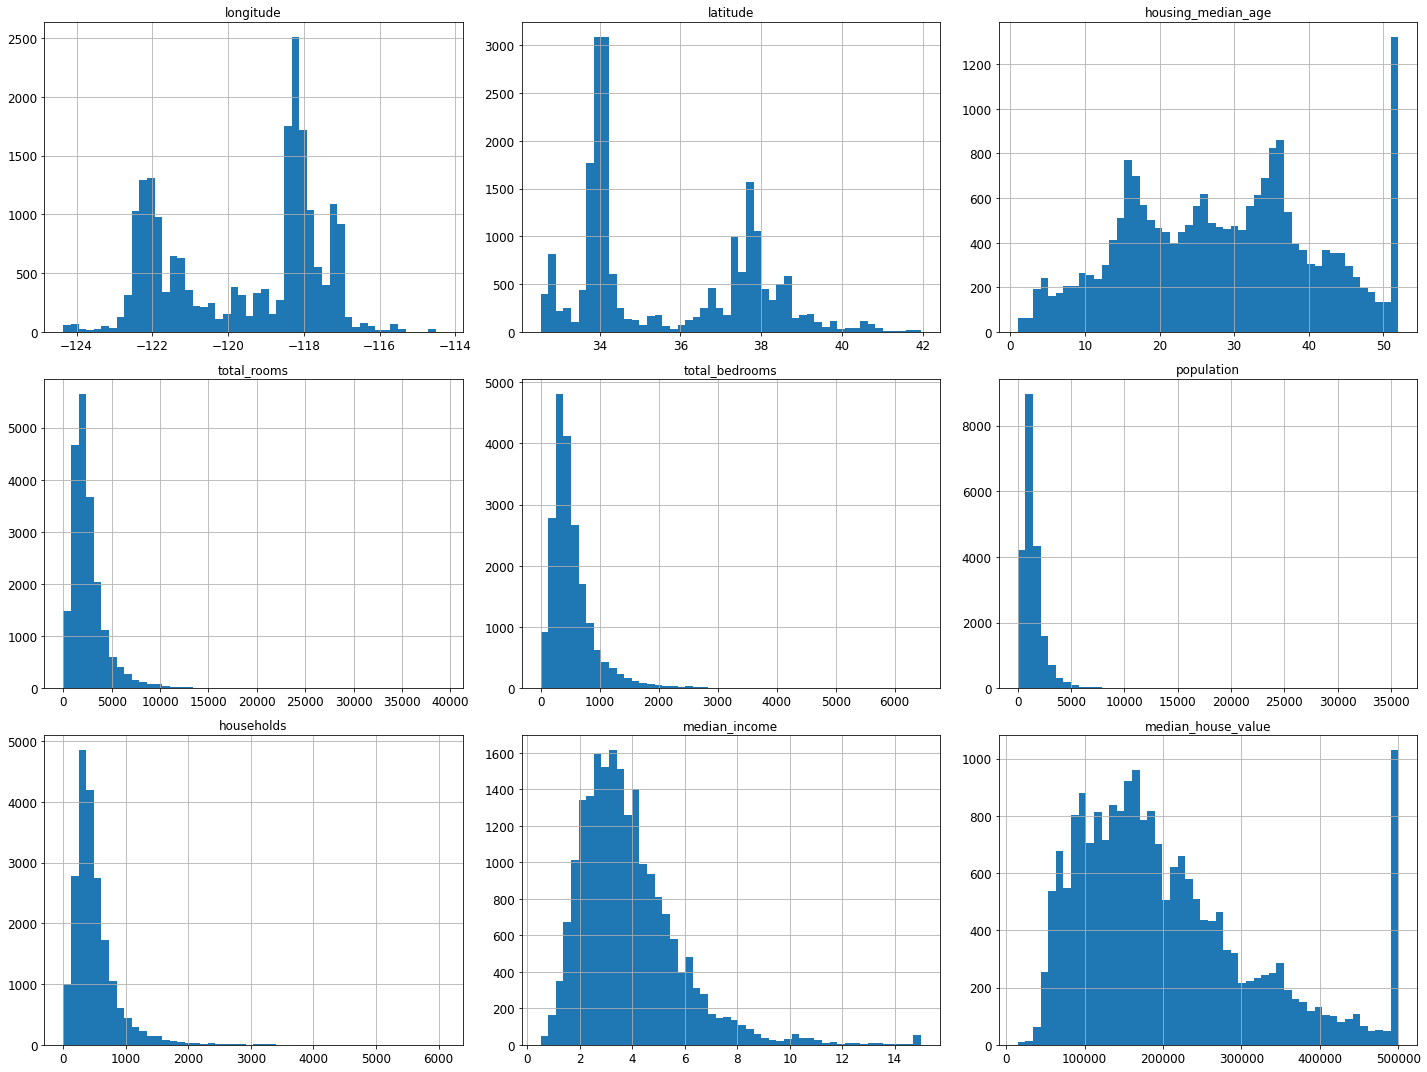

In [9]:
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histpogram_plots")
plt.show()

#Create a test set

In [10]:
np.random.seed(3745)

def split_train_test(data, test_ratio):
    """Splits dataset to train and test sets using test_ratio."""
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [11]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]
    

In [13]:
housing_with_id = housing.reset_index() # adds an index column
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
print(len(train_set)); print(len(test_set))

16512
4128


In [16]:
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
housing_with_id['id']

0       -122192.12
1       -122182.14
2       -122202.15
3       -122212.15
4       -122212.15
           ...    
20635   -121050.52
20636   -121170.51
20637   -121180.57
20638   -121280.57
20639   -121200.63
Name: id, Length: 20640, dtype: float64

In [17]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(len(train_set)); print(len(test_set));

16322
4318


In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=3745)
print(len(train_set)); print(len(test_set))

16512
4128


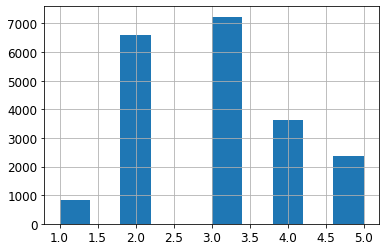

In [19]:
# Categorize median income to 5 category
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

# Stratified shuffle sampling

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=3745)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [24]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [25]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [26]:
# Remove the 'income_cat' attribute from test and train data
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
copy_housing = strat_train_set.copy()

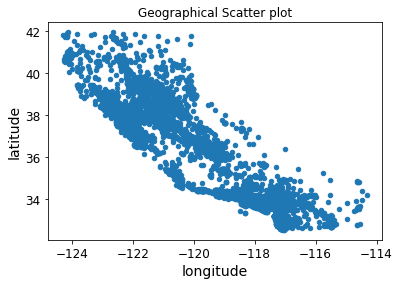

In [30]:
# Visualizing geographical data
copy_housing.plot(kind='scatter', x='longitude', y='latitude')
plt.title("Geographical Scatter plot")
plt.show()

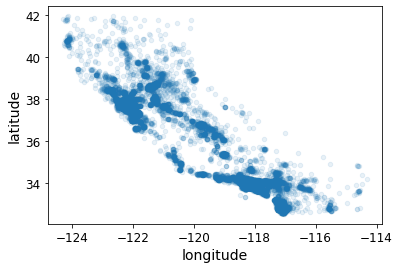

In [31]:
copy_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()

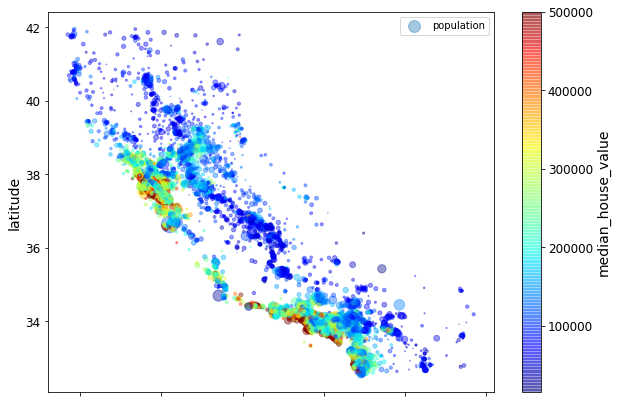

In [34]:
copy_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
                  s=copy_housing['population']/100, label='population', 
                  figsize=(10, 7), c="median_house_value", 
                  cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

# Correlation between features

In [35]:
corr_matrix = copy_housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924431,-0.108786,0.047507,0.072035,0.102688,0.057707,-0.016224,-0.045251
latitude,-0.924431,1.000000,0.010439,-0.038439,-0.068973,-0.112335,-0.073451,-0.079679,-0.145504
housing_median_age,-0.108786,0.010439,1.000000,-0.357301,-0.316607,-0.297811,-0.299608,-0.121287,0.104338
total_rooms,0.047507,-0.038439,-0.357301,1.000000,0.931064,0.864699,0.918949,0.202729,0.140476
total_bedrooms,0.072035,-0.068973,-0.316607,0.931064,1.000000,0.886415,0.980233,-0.002491,0.055763
population,0.102688,-0.112335,-0.297811,0.864699,0.886415,1.000000,0.914518,0.011155,-0.017190
households,0.057707,-0.073451,-0.299608,0.918949,0.980233,0.914518,1.000000,0.018678,0.072346
median_income,-0.016224,-0.079679,-0.121287,0.202729,-0.002491,0.011155,0.018678,1.000000,0.687870
median_house_value,-0.045251,-0.145504,0.104338,0.140476,0.055763,-0.017190,0.072346,0.687870,1.000000


In [37]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687870
total_rooms           0.140476
housing_median_age    0.104338
households            0.072346
total_bedrooms        0.055763
population           -0.017190
longitude            -0.045251
latitude             -0.145504
Name: median_house_value, dtype: float64